In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [2]:
df=pd.read_csv(r"C:\Users\purna\Dropbox\PC\Documents\python data visualization documents\stock_data.csv",parse_dates=True,index_col="Date")

In [3]:
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA


In [4]:
pd.isnull(df).sum()

Unnamed: 0    3019
Open             0
High             0
Low              0
Close            0
Volume           0
Name             0
dtype: int64

In [5]:
df.drop(columns='Unnamed: 0' ,inplace=True)
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [7]:
import warnings
import pandas as pd

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Plotting Line plot for Time Series data

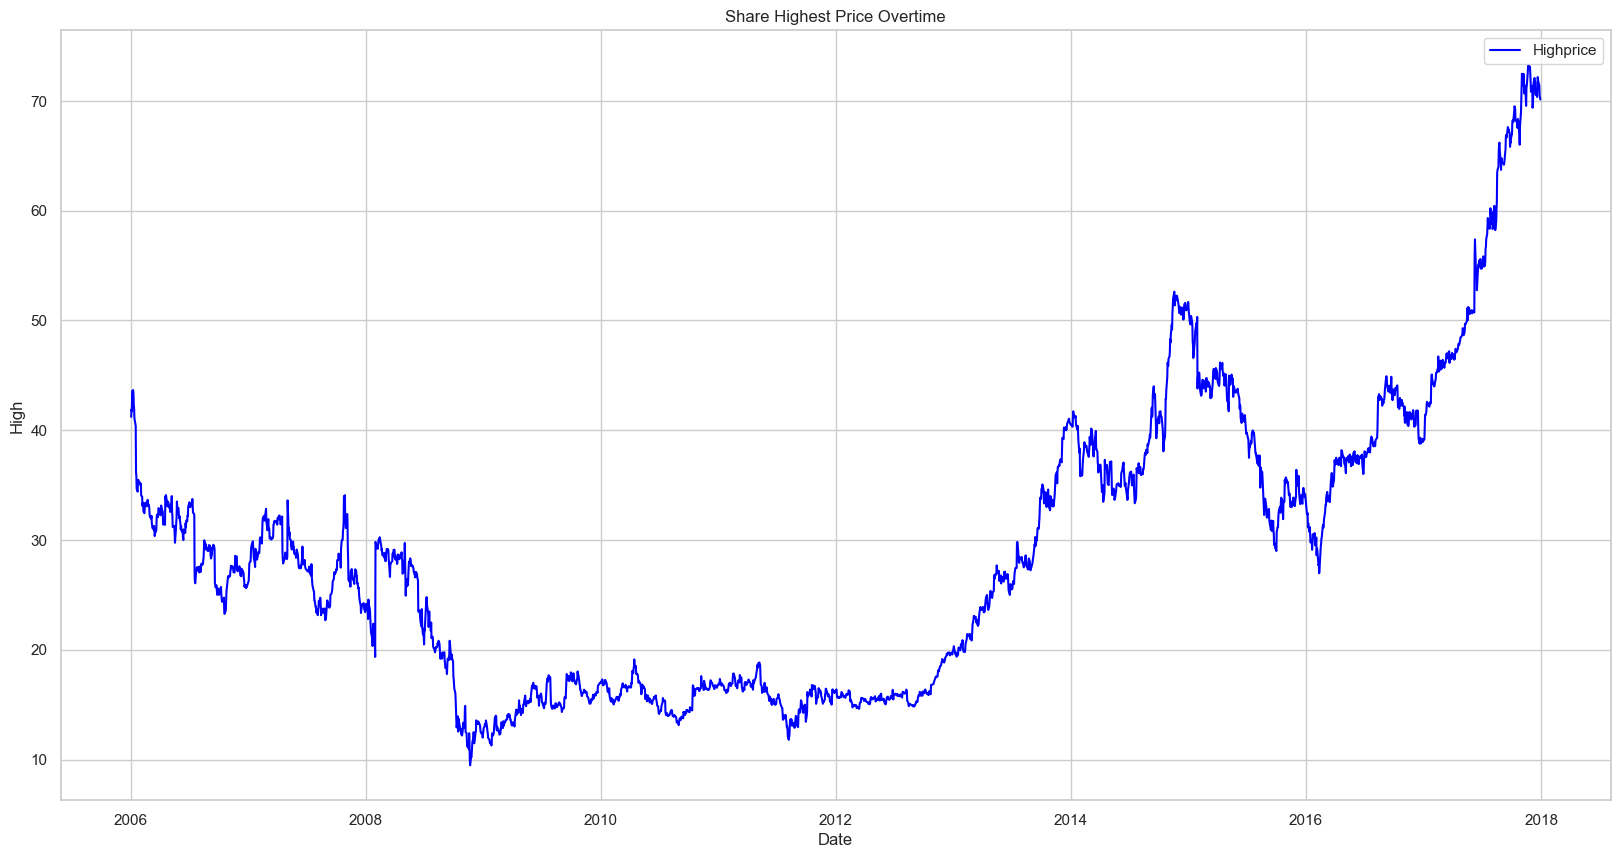

In [10]:
# Setting the style to whitegrid for a clean background
sns.set(style="whitegrid")
# Setting the figure size
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x='Date',y='High',label='Highprice',color='blue')
# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Overtime')
plt.show()


## Resampling

                 Open       High        Low      Close        Volume  Name
Date                                                                      
2006-01-31  38.245500  38.694000  37.641500  38.113000  3.400594e+07   NaN
2006-02-28  33.141579  33.436842  32.627368  32.975789  2.329848e+07   NaN
2006-03-31  31.333478  31.696957  30.929130  31.218696  2.095522e+07   NaN
2006-04-30  32.383684  32.790000  31.914737  32.283158  2.200768e+07   NaN
2006-05-31  31.744545  32.175455  31.171364  31.517273  2.218047e+07   NaN
...               ...        ...        ...        ...           ...   ...
2017-08-31  61.336522  61.964348  60.763478  61.434783  5.878167e+06   NaN
2017-09-30  65.530000  66.081000  65.013500  65.538000  6.951704e+06   NaN
2017-10-31  67.611364  68.184091  67.093636  67.637727  5.671722e+06   NaN
2017-11-30  71.223333  71.772381  70.414286  71.092857  9.277853e+06   NaN
2017-12-31  70.144500  70.927000  69.483000  70.174500  1.147866e+07   NaN

[144 rows x 6 columns]


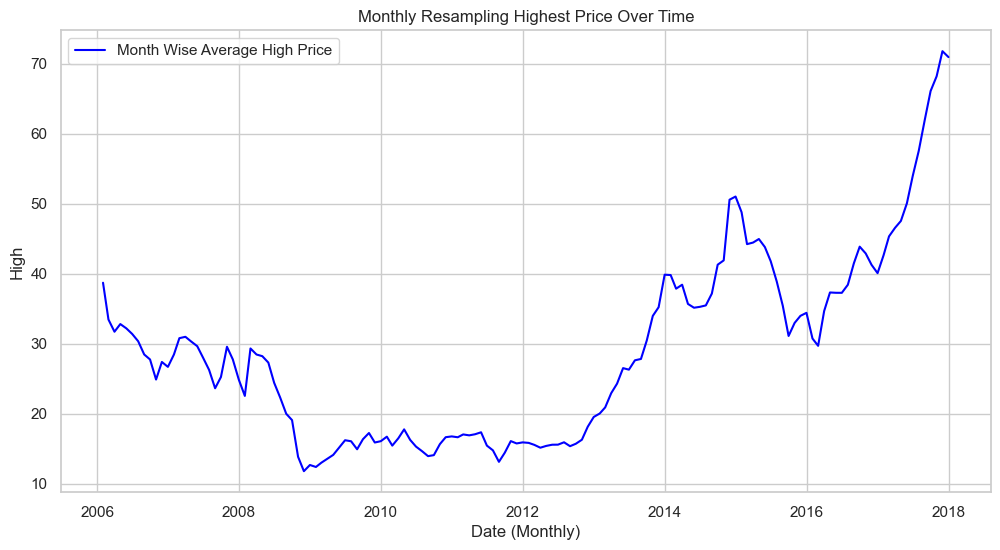

In [25]:
# Resampling to monthly frequency, using mean as an aggregation function
df_resampled = df.resample('M').mean() 
print(df_resampled)
# Setting the style to whitegrid for a clean background
sns.set(style="whitegrid") 
# Setting the figure size
plt.figure(figsize=(12, 6)) 
# Plotting the 'High' column with seaborn, setting x as the resampled 'Date'
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')
# Adding labels and title
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')
plt.show()

### Detecting Seasonality Using Auto Correlation

<Figure size 1600x500 with 0 Axes>

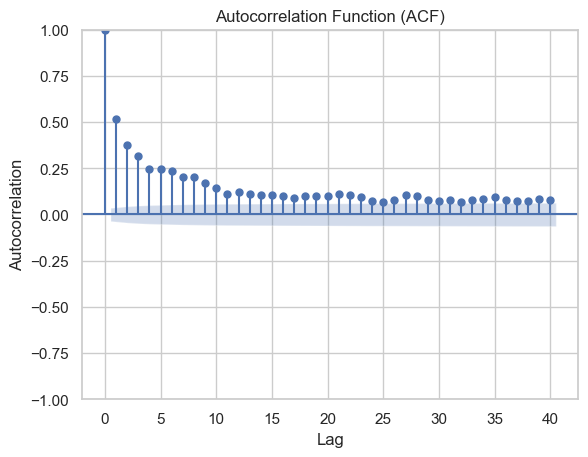

In [33]:
# setting figuresize
plt.figure(figsize=(16,5))
# plt ACF
plot_acf(df['Volume'],lags=40)  # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

### Detecting Stationarity

In [35]:
result = adfuller(df['High'])
print('ADF Statistic:',result[0])
print('p-values:',result[1])
print('Critical value',result[4])


ADF Statistic: 0.7671404880535949
p-values: 0.9910868050318213
Critical value {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


### Smoothening the data using Differencing 

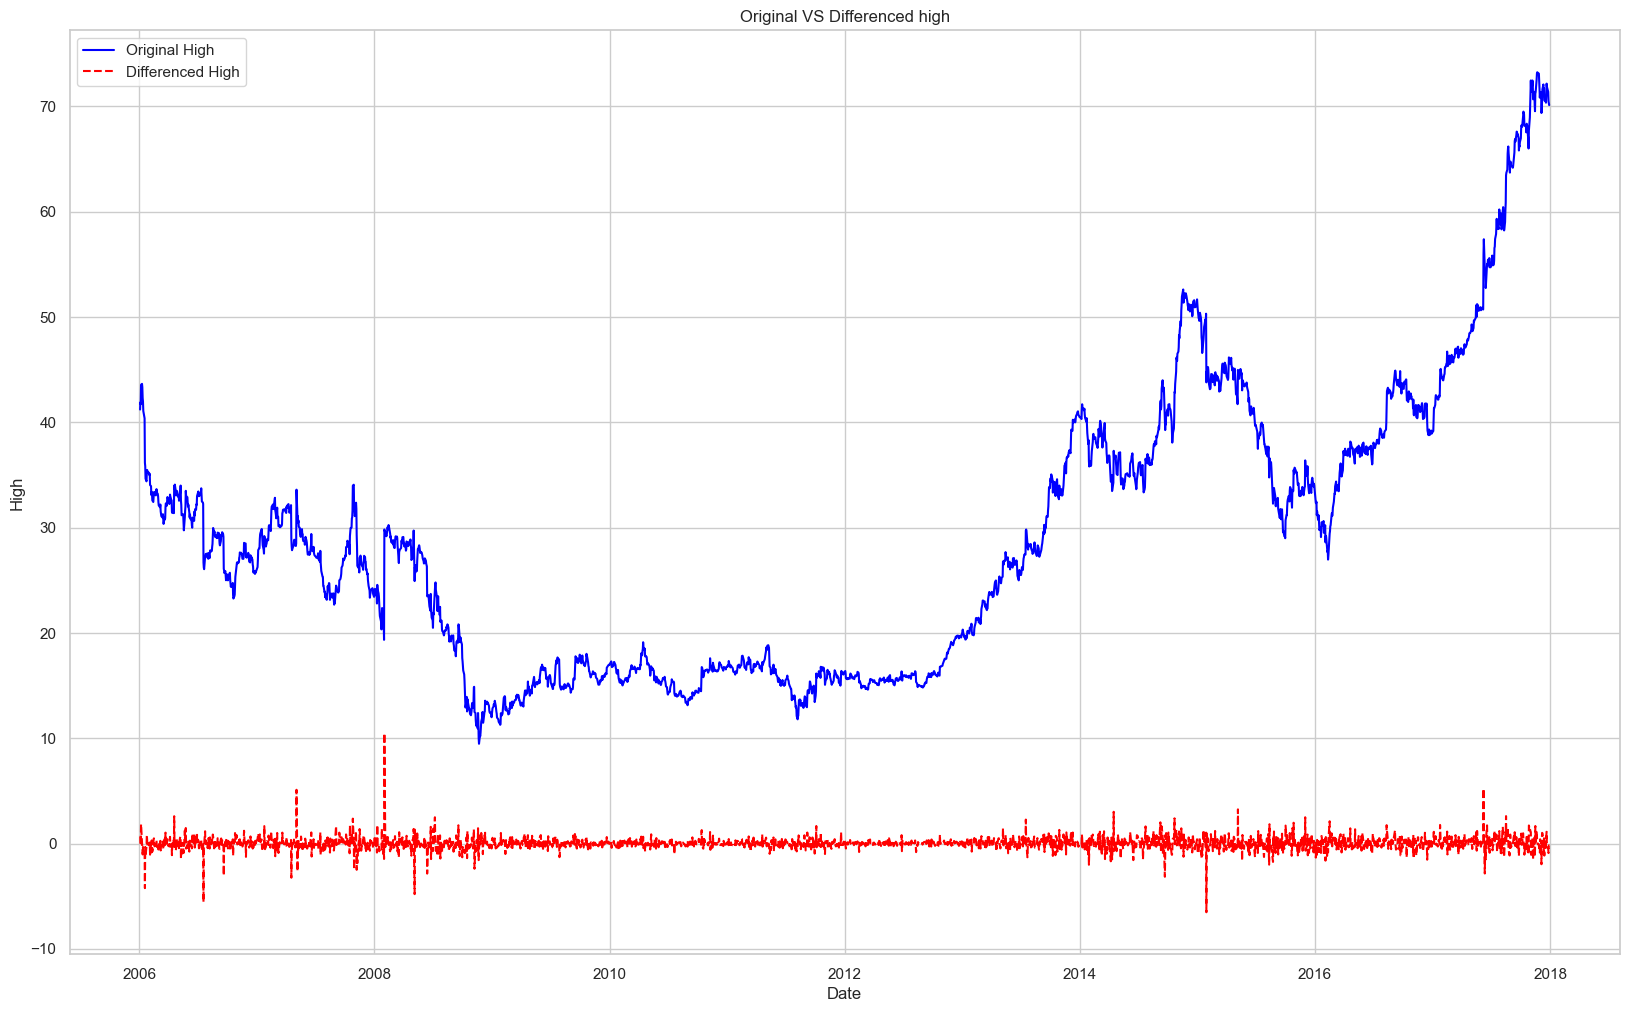

In [48]:
# Differencing
df['High_diff']=df['High'].diff()
# setting figure size
plt.figure(figsize=(20,12))
#plotting the original and difference High values
plt.plot(df['High'] ,label='Original High', color='blue')
plt.plot(df['High_diff'] ,label='Differenced High',linestyle='--',color='red')
# Adding labels
plt.xlabel('Date')
plt.ylabel('High')
plt.legend()
plt.title('Original VS Differenced high')
plt.show()

### Smoothening the data using  Moving Average

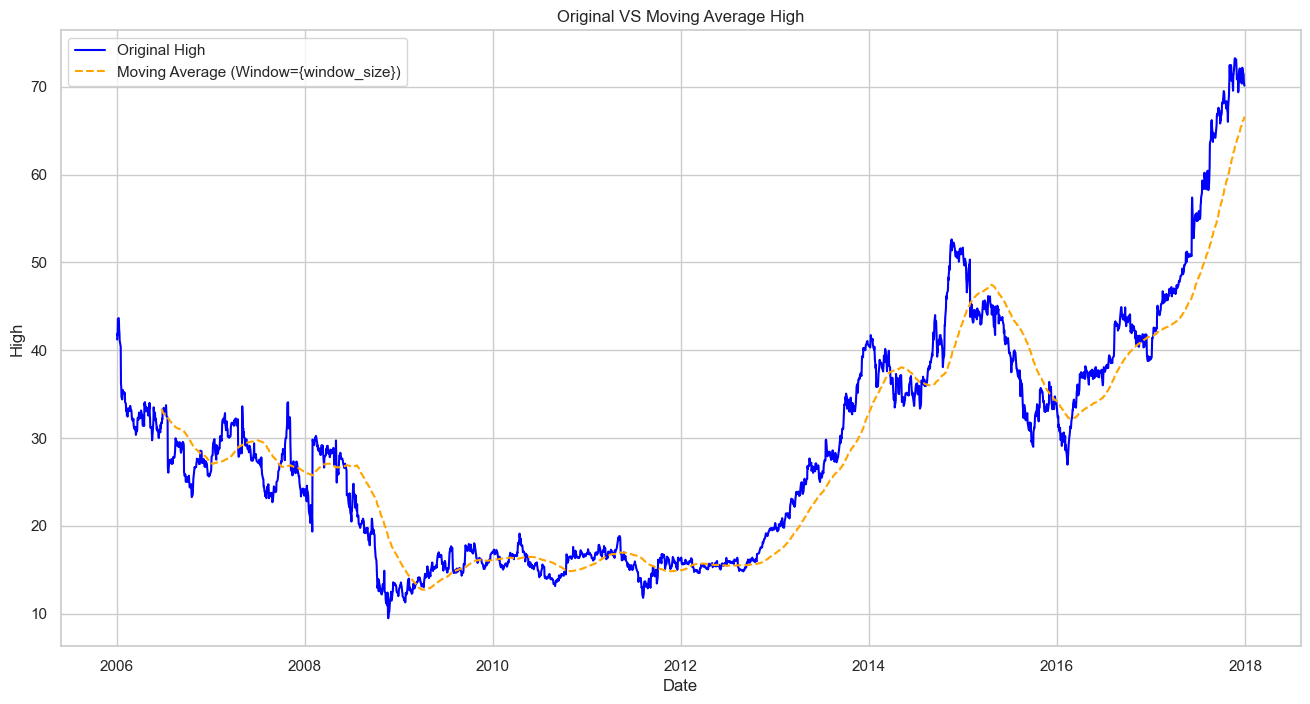

In [52]:
# Moving Average
window_size=120
df['High_Avg']=df['High'].rolling(window=window_size).mean()
# setting figure size
plt.figure(figsize=(16,8))
# plotting the Original and Average High values 
plt.plot(df['High'],label='Original High',color='blue')
plt.plot(df['High_Avg'],label='Moving Average (Window={window_size})', linestyle='--', color='orange')
# Adding labels
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original VS Moving Average High')
plt.legend()
plt.show()




## Original Data Vs Differenced Data

#### Printing the original and differenced data side by side we get;


In [53]:
# Create a DataFrame with 'high' and 'high_diff' columns side by side
df_combined=pd.concat([df['High'],df['High_diff']],axis=1)
# Display the combined Dataframe
df_combined.head()

,High,High_diff
Date,,
2006-01-03,41.22,NaN
2006-01-04,41.90,0.68
2006-01-05,41.73,-0.17
2006-01-06,43.57,1.84
2006-01-09,43.66,0.09


#### As, there is a NaN value we will drop that proceed with our test,

In [56]:
# Remove rows with missing values
df.dropna(subset=['High_diff'],inplace=True)
# display
df['High_diff'].head()

Date
2006-01-04    0.68
2006-01-05   -0.17
2006-01-06    1.84
2006-01-09    0.09
2006-01-10   -0.32
Name: High_diff, dtype: float64

In [59]:
result=adfuller(df['High_diff'])
print('ADF Statastics:',result[0])
print('p-value:',result[1])
print('Critical values:',result[4])

ADF Statastics: -12.148367478343228
p-value: 1.5912766134150183e-22
Critical values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}
